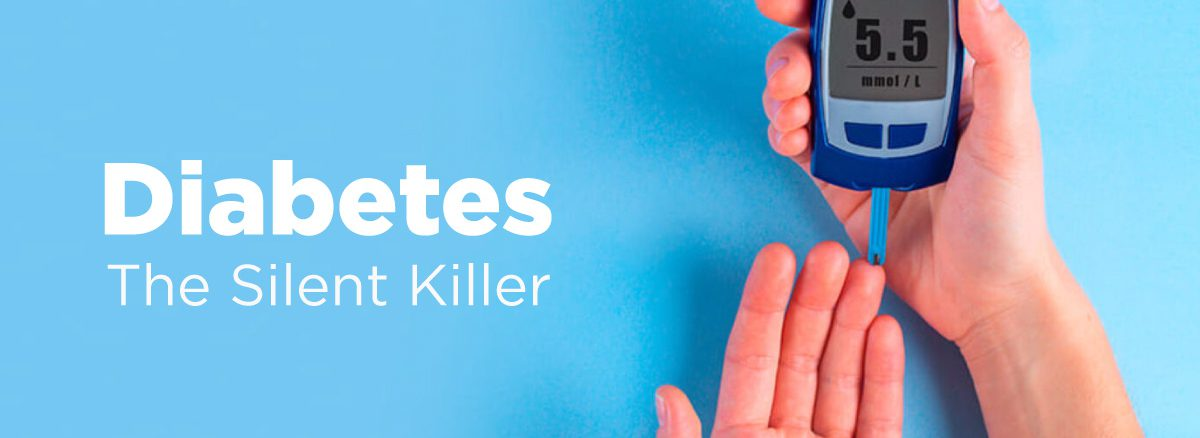

Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)


Import dataset

In [62]:
dbetes=pd.read_csv("diabetes.csv")

In [63]:
dbetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
dbetes.shape

(768, 9)

In [65]:
dbetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no NULL values

In [66]:
dbetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#  Exploratory Data Analysis


There are zero values in BMI,Insulin,skinthickness,bloodpressure,glucose and we have to look at distribution of pregnancies.

In [67]:
print("total rows in dataset: {0}".format(len(dbetes)))
print('total rows in Pregnancies: {0}'.format(sum(dbetes['Pregnancies']==0)))
print('total rows in Glucose: {0}'.format(sum(dbetes['Glucose']==0)))
print('total rows in BloodPressure: {0}'.format(sum(dbetes['BloodPressure']==0)))
print('total rows in SkinThickness: {0}'.format(sum(dbetes['SkinThickness']==0)))
print('total rows in Insulin: {0}'.format(sum(dbetes['Insulin']==0)))
print('total rows in BMI: {0}'.format(sum(dbetes['BMI']==0)))
print('total rows in DiabetesPedigreeFunction: {0}'.format(sum(dbetes['DiabetesPedigreeFunction']==0)))
print('total rows in Age: {0}'.format(sum(dbetes['Age']==0)))

total rows in dataset: 768
total rows in Pregnancies: 111
total rows in Glucose: 5
total rows in BloodPressure: 35
total rows in SkinThickness: 227
total rows in Insulin: 374
total rows in BMI: 11
total rows in DiabetesPedigreeFunction: 0
total rows in Age: 0


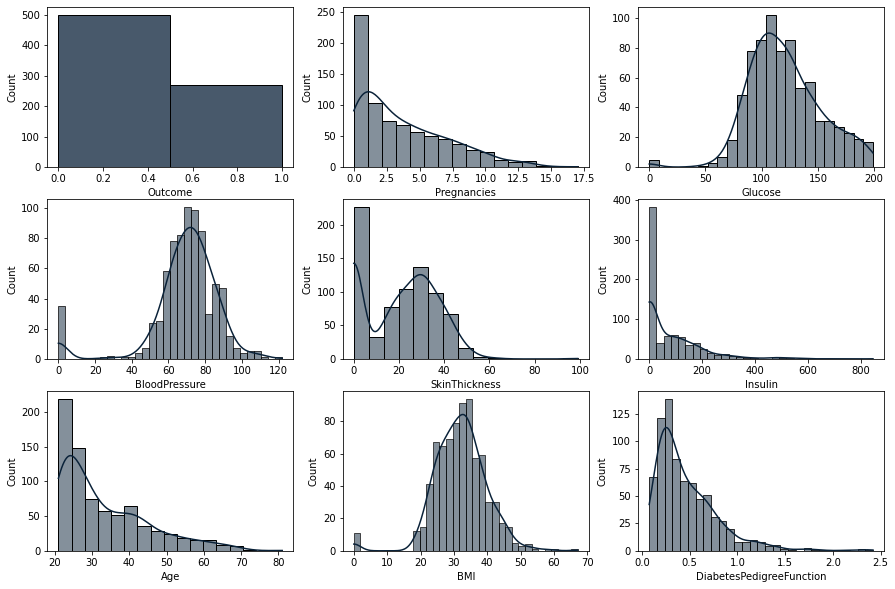

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1);
sns.histplot(x='Outcome',data=dbetes,bins=2,color='#0A2239',edgecolor='black')

plt.subplot(3,3,2)
sns.histplot(x='Pregnancies',data=dbetes,kde='true',color='#0A2239',edgecolor='black')

plt.subplot(3,3,3)
sns.histplot(x='Glucose',data=dbetes,kde='true',color='#0A2239',edgecolor='black')

plt.subplot(3,3,4)
sns.histplot(x='BloodPressure',data=dbetes,kde='true',color='#0A2239',edgecolor='black')

plt.subplot(3,3,5)
sns.histplot(x='SkinThickness',data=dbetes,kde='true',color='#0A2239',edgecolor='black')

plt.subplot(3,3,6)
sns.histplot(x='Insulin',data=dbetes,kde='true',color='#0A2239',edgecolor='black')

plt.subplot(3,3,7)
sns.histplot(x='Age',data=dbetes,kde='true',color='#0A2239',edgecolor='black')

plt.subplot(3,3,8)
sns.histplot(x='BMI',data=dbetes,kde='true',color='#0A2239',edgecolor='black')

plt.subplot(3,3,9)
sns.histplot(x='DiabetesPedigreeFunction',data=dbetes,kde='true',color='#0A2239',edgecolor='black')



1.   In our dataset most of the people have age between 20-40.
2.   BMI more than 20 thus overweight or obese thus contributing to diabetes.
3. Skin thickness,DiabetesPedigree function,Age are right skewed.  



In [69]:
dbetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


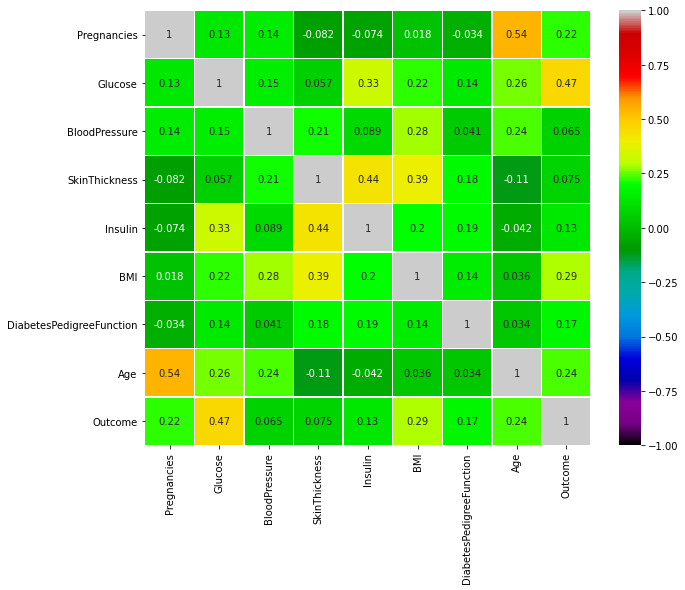

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(dbetes.corr(),annot=True,linewidths=.5,cmap='nipy_spectral',vmin=-1,vmax=1)

In [71]:
dt=dbetes[['Age','BMI','Insulin','Pregnancies','SkinThickness','Outcome']]

In [72]:
dt.head()

,Age,BMI,Insulin,Pregnancies,SkinThickness,Outcome
0,50,33.6,0,6,35,1
1,31,26.6,0,1,29,0
2,32,23.3,0,8,0,1
3,21,28.1,94,1,23,0
4,33,43.1,168,0,35,1


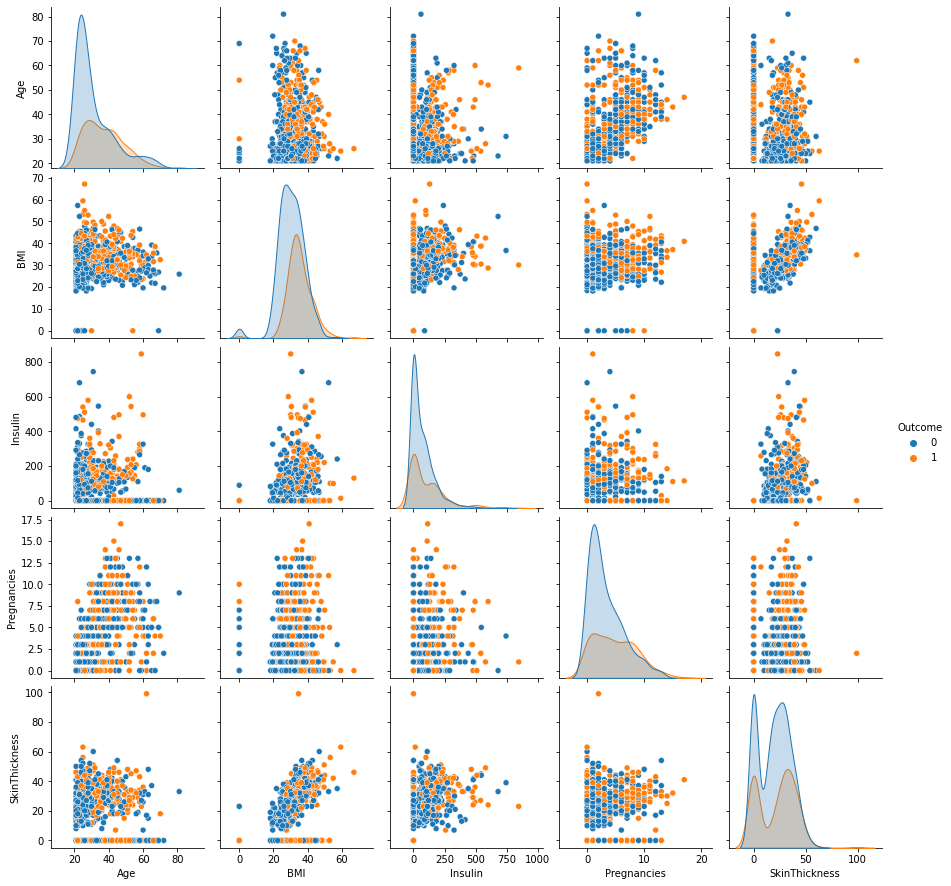

In [73]:
sns.pairplot(dt,hue='Outcome')



1.   From Age vs BMI we can see that people with more age and BMI more likely to have diabetes.
2.   Skin Thickness has highly positive correlation with BMI and as we can see from pairplot it increases linearly with BMI. As it is intuitive Obese people having thick skin.
3. People with low BMI and less pregnancies are less prone to diabetes.
4. skin thickness has -ve correlation with Age as older people generally thin skin.



# Data Preprocessing



1.   There are 0 values in BMI,Insulin,Glucose,BloodPressure,Skin thickness.
2.   Human body attributes like BMI,Insulin can never be zero so i will replace them with NAN



In [74]:
dbetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dbetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [75]:
dbetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [76]:
X = dbetes.iloc[:, :-1].values
y = dbetes.iloc[:, -1].values

In [77]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [78]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

I have to replace NAN number before applying model but if i do that before spliting there would some information leakage. So i will do that afterwards.



split into test set and training set

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Replace missing values with zero

In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
imputer2=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_test)
X_test=imputer.transform(X_test)

In [81]:
print(X_test)

[[  7.    136.     74.    ...  26.      0.647  51.   ]
 [  1.    151.     60.    ...  26.1     0.179  22.   ]
 [  6.    109.     60.    ...  25.      0.206  27.   ]
 ...
 [  1.     91.     54.    ...  25.2     0.234  23.   ]
 [ 10.    168.     74.    ...  38.      0.537  34.   ]
 [  9.    112.     82.    ...  34.2     0.26   36.   ]]


In [82]:
np.count_nonzero(np.isnan(X_train))

0

In [83]:
np.count_nonzero(np.isnan(X_test))

0

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:

X_train

array([[ 3.3536084 ,  0.47937492, -0.19329226, ...,  0.71234492,
        -0.94690147,  0.81020454],
       [-1.12101735, -0.82633552, -0.66475931, ...,  0.66874369,
         0.39612987, -0.69526203],
       [-0.82270897, -0.19022018, -0.19329226, ..., -0.69742799,
        -0.7936697 , -1.02981015],
       ...,
       [ 2.75699163,  0.14457737,  1.37826456, ...,  1.62797062,
         0.34505262,  0.72656751],
       [ 0.07221618,  1.65116634, -0.03613658, ...,  1.6570381 ,
         0.03258   , -0.611625  ],
       [ 1.5637581 , -0.65893675,  0.27817478, ...,  0.10192778,
         0.59142526,  1.06111563]])

# Classification Models

Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("confusion matix\n",cm)
lgr=accuracy_score(y_test,y_pred)
print("Accuracy Score for Logistic regression: ",lgr)

confusion matix
 [[131  15]
 [ 36  49]]
Accuracy Score for Logistic regression:  0.7792207792207793


K nearest neighbors

In k nearest neighbors we have to decide number of neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,21):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  error_rate.append(np.mean(y_pred != y_test))


Let us view error rate vs neighbors to choose number of neighbors

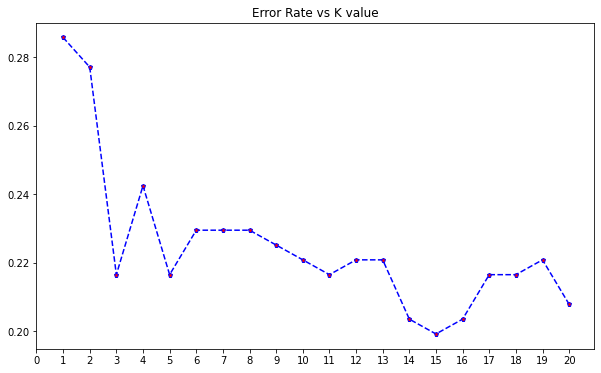

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, color='blue', linestyle='--', marker='p', markerfacecolor='red', markersize=5)
plt.xticks(np.arange(0, 21, 1.0))
plt.title('Error Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')


choose neighbors =15

In [90]:
classifier = KNeighborsClassifier(n_neighbors = i)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [91]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matix\n",cm)
knn=accuracy_score(y_test,y_pred)
print("Accuracy Score for K nearest neighbors: ",knn)

confusion matix
 [[137   9]
 [ 39  46]]
Accuracy Score for K nearest neighbors:  0.7922077922077922


Random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
rff = RandomForestClassifier(n_estimators = 100,  random_state = 0)
rff.fit(X_train, y_train)
y_pred = rff.predict(X_test)

In [93]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matix\n",cm)
rfc=accuracy_score(y_test,y_pred)
print("Accuracy Score for Random Forest: ",rfc)

confusion matix
 [[129  17]
 [ 35  50]]
Accuracy Score for Random Forest:  0.7748917748917749


Hyperparameter tuning for random forest

In [94]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num=10)] 
max_features = ['auto', 'sqrt','log2']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]
criterion =['gini','entropy']

In [95]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
              'criterion': criterion}


In [96]:
from sklearn.model_selection import GridSearchCV


In [97]:
grid_search = GridSearchCV(estimator = rff, param_grid = param_grid, verbose=3, cv=5, n_jobs = 4)


In [98]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   37.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   59.3s
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 4800 out of 4800 | elapsed:  5.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [99]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [100]:
grid_search.best_score_

0.7691588785046729

In [101]:
y_pred=grid_search.predict(X_test)

In [102]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matix\n",cm)
rfct=accuracy_score(y_test,y_pred)
print("Accuracy Score for Random Forest after tuning: ",rfct)

confusion matix
 [[130  16]
 [ 36  49]]
Accuracy Score for Random Forest after tuning:  0.7748917748917749


No benefit from tuning of random forest parameters

SVM

In [103]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)


In [104]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matix\n",cm)
svm=accuracy_score(y_test,y_pred)
print("Accuracy Score for SVM: ",svm)

confusion matix
 [[136  10]
 [ 39  46]]
Accuracy Score for SVM:  0.7878787878787878


In [105]:
param_grid_svm = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
from sklearn.model_selection import RandomizedSearchCV
rndm_cv = RandomizedSearchCV(estimator=svc_model, param_distributions=param_grid_svm, cv=10, verbose=2)
rndm_cv.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .................................. gamma=0.1, C=10, total=   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. gamma=0.01, C=1, total=   0.0s
[CV] gamma=0.01, C=1 .................................................
[CV] .................................. gamma=0.01, C=1, total=   0.0s
[CV] gamma=0.0001, C=100 .............................................
[CV] .............................. gamma=0.0001, C=100, total=   0.0s
[CV] gamma=0.0001, C=100 .............................................
[CV] .............................. gamma=0.0001, C=100, total=   0.0s
[CV] gamma=0.0001, C=100 .............................................
[CV] .............................. gamma=0.0001, C=100, total=   0.0s
[CV] gamma=0.0001, C=100 .............................................
[CV] .............................. gamma=0.0001, C=100, total=   0.0s
[CV] gamma=0.0001, C=100 .............................................
[CV] .............................. gamma=0.0001, C=100, total=   0.0s
[CV] gamma=0.0001, C=100 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [106]:
rndm_cv.best_params_

{'C': 100, 'gamma': 0.0001}

In [107]:
y_pred = rndm_cv.predict(X_test)


In [108]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matix\n",cm)
svmt=accuracy_score(y_test,y_pred)
print("Accuracy Score for SVM after tuning: ",svmt)

confusion matix
 [[133  13]
 [ 39  46]]
Accuracy Score for SVM after tuning:  0.7748917748917749


Let us compare accuracy score of models used above

In [109]:
print('The accuracy score of Logistic Regression Model is: ', round(lgr*100,2),'%')
print('The accuracy score of K Nearest Neighbors Model is: ', round(knn*100,2),'%')
print('The accuracy score of Random Forests Model is: ', round(rfc*100,2),'%')
print('The accuracy score of SVM Model is: ', round(svm*100,2),'%')



The accuracy score of Logistic Regression Model is:  77.92 %
The accuracy score of K Nearest Neighbors Model is:  79.22 %
The accuracy score of Random Forests Model is:  77.49 %
The accuracy score of SVM Model is:  78.79 %
